# ML Data Fitting

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Testing GLM model fit

In [4]:
X_GLM = pd.read_csv("airbnb_GLM_ready.csv")
X_GLM

,host_tenure,days_between_reviews,n_amenities,review_gap_days,distance_to_city_center,beds,accommodates,number_of_reviews,review_scores_rating,host_response_rate_log,...,Cable TV,Free parking on premises,Lock on bedroom door,Buzzer/wireless intercom,24-hour check-in,Elevator,Safety card,Indoor fireplace,Self Check-In,Gym
0,7.261927,7.240650,3.178054,7.240650,2.324580,1.609438,1.945910,4.941642,0.875,4.615121,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.219892,0.0,0.0,0.000000
1,6.739337,4.304065,3.258097,4.304065,0.864130,0.693147,1.098612,2.079442,0.925,4.615121,...,0.163706,0.000000,0.000000,0.000000,0.00000,0.221355,0.000000,0.0,0.0,0.000000
2,7.793587,0.000000,2.639057,0.000000,0.763389,0.693147,1.386294,0.693147,1.000,4.615121,...,0.259828,0.000000,0.000000,0.000000,0.00000,0.351325,0.000000,0.0,0.0,0.380712
3,6.675823,0.000000,2.772589,0.000000,2.316612,0.693147,1.098612,0.693147,0.900,4.615121,...,0.000000,0.000000,0.401689,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000
4,7.272398,5.918894,2.890372,5.918894,2.282459,0.693147,1.609438,3.258097,0.950,4.418841,...,0.000000,0.000000,0.309555,0.313966,0.00000,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7.104965,4.406719,2.708050,4.406719,1.342838,1.098612,1.386294,3.367296,0.850,4.615121,...,0.000000,0.000000,0.443921,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000
496,7.617268,0.000000,2.890372,0.000000,2.004368,0.693147,1.098612,0.000000,0.900,0.000010,...,0.000000,0.220213,0.000000,0.250882,0.00000,0.000000,0.000000,0.0,0.0,0.000000
497,6.897705,0.000000,2.833213,0.000000,2.530666,1.609438,1.609438,0.000000,0.900,0.000010,...,0.000000,0.000000,0.338793,0.000000,0.00000,0.400626,0.386506,0.0,0.0,0.000000
498,6.917706,5.913503,2.833213,5.913503,2.367129,1.386294,1.791759,4.077537,0.775,4.615121,...,0.000000,0.000000,0.000000,0.000000,0.35805,0.000000,0.000000,0.0,0.0,0.000000


In [5]:
import statsmodels.api as sm
import statsmodels.tools.tools as sm_tools

X = X_GLM.drop(columns=['log_price']) 
y_GLM = X_GLM['log_price']

X_const = sm.add_constant(X)

model = sm.OLS(y_GLM, X_const).fit()

print(model.summary())

ModuleNotFoundError: No module named 'statsmodels'

In [4]:
significant_features = model.pvalues[model.pvalues < 0.05]
pd.set_option('display.float_format', '{:.6f}'.format)
print(significant_features)

const                     0.001596
days_between_reviews      0.002021
review_gap_days           0.002021
distance_to_city_center   0.000296
accommodates              0.000013
number_of_reviews         0.005477
room_type_Shared room     0.000000
room_type                 0.008339
bathrooms                 0.000000
sentiment                 0.000427
description_score         0.002337
Internet                  0.039929
Smoke detector            0.022606
Indoor fireplace          0.022474
dtype: float64


In [5]:
import statsmodels.api as sm

significant_feature_names = significant_features.index.tolist()
if 'const' in significant_feature_names:
    significant_feature_names.remove('const')

X_significant = X_GLM[significant_feature_names]
y = y_GLM  # assuming you have the target variable already

X_significant_const = sm.add_constant(X_significant)

model_significant = sm.OLS(y, X_significant_const).fit()

print(model_significant.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     57.54
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           2.30e-85
Time:                        15:55:36   Log-Likelihood:                -324.67
No. Observations:                 500   AIC:                             675.3
Df Residuals:                     487   BIC:                             730.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     57.54
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           2.30e-85
Time:                        15:55:37   Log-Likelihood:                -324.67
No. Observations:                 500   AIC:                             675.3
Df Residuals:                     487   BIC:                             730.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

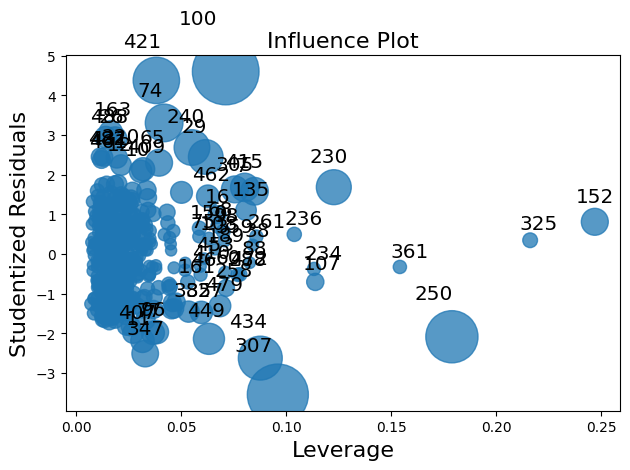

In [6]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures


X_GLM = pd.read_csv("airbnb_GLM_ready.csv")
y_GLM = X_GLM['log_price']
X_GLM = X_GLM.drop(columns='log_price')

X_with_const = sm.add_constant(X_GLM)
model = sm.OLS(y_GLM, X_with_const).fit()

significant = model.pvalues[model.pvalues < 0.05].index
significant = significant.drop('const', errors='ignore')
X_sig = X_GLM[significant] #drop(columns='cleaning_fee')

X_sig_const = sm.add_constant(X_sig)
model_sig = sm.OLS(y_GLM, X_sig_const).fit()
print(model_sig.summary())

ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_sig, y_GLM)
print("\nRidge R² score:", ridge.score(X_sig, y_GLM))
print("Ridge Coefficients:", pd.Series(ridge.coef_, index=X_sig.columns))

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_sig)

X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X_sig.columns))
X_poly_df_const = sm.add_constant(X_poly_df)
model_poly = sm.OLS(y_GLM, X_poly_df_const).fit()
print("\nPolynomial Model Summary:")
print(model_poly.summary())

influence = model_sig.get_influence()
sm.graphics.influence_plot(model_sig, criterion="cooks")
plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error
y_pred_ridge = ridge.predict(X_sig)
rmse_ridge = np.sqrt(mean_squared_error(y_GLM, y_pred_ridge))
print("Ridge RMSE:", rmse_ridge)

Ridge RMSE: 0.4639789038786442


In [8]:
from sklearn.model_selection import train_test_split
from itertools import combinations

X = X_GLM #.drop(columns='log_price')
y = y_GLM

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def calculate_metrics(X_subset, y_train, X_test, y_test):
    X_train_const = sm.add_constant(X_subset)
    model = sm.OLS(y_train, X_train_const).fit()
    X_test_const = sm.add_constant(X_test[X_subset.columns])
    y_pred = model.predict(X_test_const)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return model, rmse

# ==== Best Subset Selection ====
def best_subset_selection(X_train, y_train, X_test, y_test, max_features):
    best_adj_r2 = -np.inf
    best_model = None
    best_features = None

    for k in range(1, max_features + 1):
        for combo in combinations(X_train.columns, k):
            X_subset = X_train[list(combo)]
            model, rmse = calculate_metrics(X_subset, y_train, X_test, y_test)
            if model.rsquared_adj > best_adj_r2:
                best_model = model
                best_features = list(combo)
    
    return best_model, best_features


# ==== Forward Selection ====

def forward_selection(X_train, y_train, X_test, y_test):
    remaining = set(X_train.columns)
    selected = []
    current_score, best_score = -np.inf, -np.inf
    best_model = None

    while remaining and current_score == best_score:
        scores = []
        for candidate in remaining: 
            features = selected + [candidate]
            model, rmse = calculate_metrics(X_train[features], y_train, X_test, y_test)
            scores.append((model.rsquared_adj, candidate, model))
        scores.sort(reverse=True)
        best_score, best_feature, best_model = scores[0]
        if best_score > current_score:
            selected.append(best_feature)
            remaining.remove(best_feature)
            current_score = best_score
        else: 
            break
    return best_model, selected

# ==== Backward Elimination ====

def backward_elimination(X_train, y_train, X_test, y_test, p_thresh=0.05):
    features = list(X_train.columns)
    while True:
        model, rmse = calculate_metrics(X_train[features], y_train, X_test, y_test)
        p_vals = model.pvalues.iloc[1:]
        worst_p = p_vals.max()
        if worst_p > p_thresh: 
            features.remove(p_vals.idxmax())
        else:
            break
    model, rmse = calculate_metrics(X_train[features], y_train, X_test, y_test)
    return model, features



In [9]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Forward Selection
sfs_forward = SFS(LinearRegression(), 
                  k_features='best', 
                  forward=True, 
                  floating=False, 
                  scoring='r2', 
                  cv=5)

sfs_forward = sfs_forward.fit(X_train, y_train)

print("Selected features (forward):", sfs_forward.k_feature_names_)

# Backward Elimination
sfs_backward = SFS(LinearRegression(), 
                   k_features='best', 
                   forward=False, 
                   floating=False, 
                   scoring='r2', 
                   cv=5)

sfs_backward = sfs_backward.fit(X_train, y_train)

#print("Selected features (backward):", sfs_backward.k_feature_names_)


Selected features (forward): ('days_between_reviews', 'distance_to_city_center', 'accommodates', 'number_of_reviews', 'review_scores_rating', 'host_response_rate_log', 'room_type_Private room', 'room_type_Shared room', 'bathrooms', 'objectivity', 'luxury_policy_flag', 'city_value_score', 'Smoke detector', 'Shampoo', 'translation missing: en.hosting_amenity_50', 'Cable TV', 'Lock on bedroom door', 'Elevator', 'Indoor fireplace')


In [11]:
forward_model, forward_features = forward_selection(X_train, y_train, X_test, y_test)
forward_features

['accommodates',
 'host_response_rate_log',
 'bathrooms',
 'distance_to_city_center',
 'room_type_Shared room',
 'room_type',
 'Indoor fireplace',
 'Cable TV',
 'Internet',
 'Elevator',
 'sentiment',
 'Gym',
 'review_scores_rating',
 'Smoke detector',
 'city_value_score',
 'Hair dryer',
 'TV',
 'Lock on bedroom door',
 'luxury_policy_flag']

In [12]:
backward_model, backward_features = backward_elimination(X_train, y_train, X_test, y_test)
backward_model
backward_features

['days_between_reviews',
 'review_gap_days',
 'distance_to_city_center',
 'accommodates',
 'number_of_reviews',
 'host_response_rate_log',
 'room_type_Shared room',
 'room_type',
 'bathrooms',
 'sentiment',
 'Internet',
 'Cable TV',
 'Elevator',
 'Indoor fireplace']

In [13]:
forward_features_2 = list(sfs_forward.k_feature_names_)
X_train_selected = X_train[forward_features_2]
X_test_selected = X_test[forward_features_2]

X_train_const = sm.add_constant(X_train_selected)
X_test_const = sm.add_constant(X_test_selected)

model_forward = sm.OLS(y_train, X_train_const).fit()
print(model_forward.summary())

y_pred = model_forward.predict(X_test_const)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\nRMSE on Test Set (Forward Selection Features): {rmse:.4f}")

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     37.28
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           9.78e-75
Time:                        15:57:47   Log-Likelihood:                -239.51
No. Observations:                 400   AIC:                             519.0
Df Residuals:                     380   BIC:                             598.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [14]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_GLM, y_GLM, test_size=0.2, random_state=42)

X_train_selected = X_train[forward_features_2]
X_test_selected = X_test[forward_features_2]

ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge.fit(X_train_selected, y_train)

y_pred_ridge = ridge.predict(X_test_selected)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Ridge RMSE:", rmse_ridge)
print("Ridge R^2:", ridge.score(X_test_selected, y_test))

Ridge RMSE: 0.469237954208383
Ridge R^2: 0.405459841844226


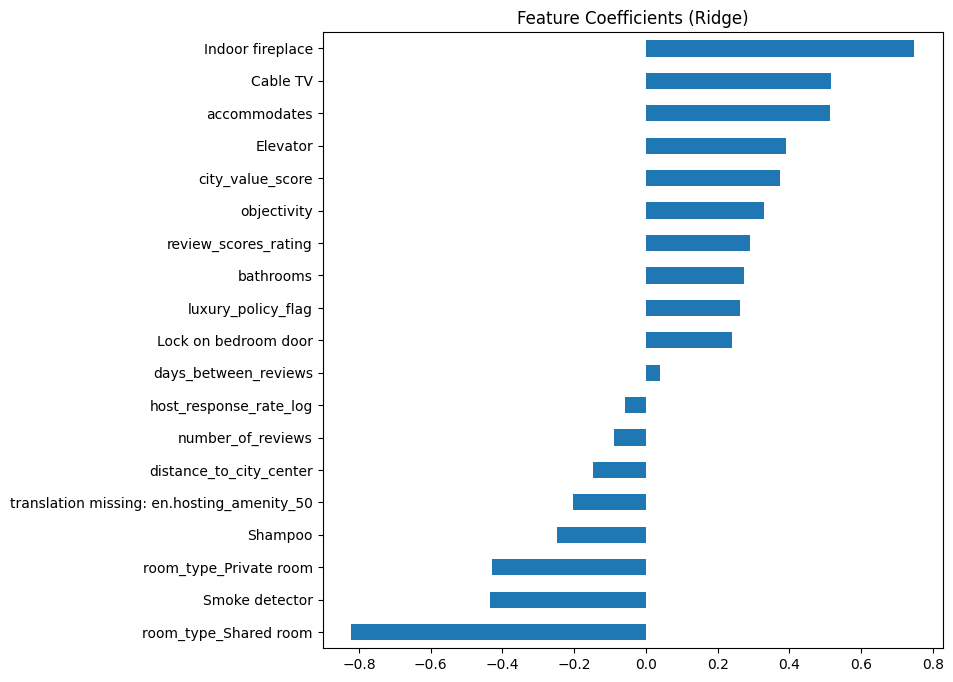

In [15]:
coefs = pd.Series(ridge.coef_, index=forward_features_2)
coefs.sort_values().plot(kind='barh', figsize=(8,8))
plt.title("Feature Coefficients (Ridge)")
plt.show()

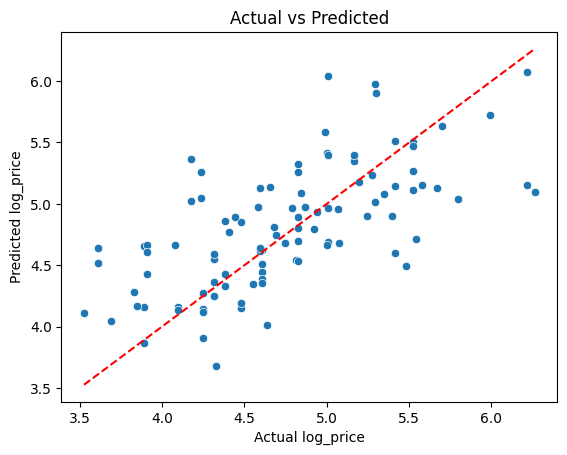

In [16]:
import seaborn as sns
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual log_price")
plt.ylabel("Predicted log_price")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

### Exploring Models that capture nonlinearities
##### Using airbnb_processed.csv

In [17]:
X_cleaned = pd.read_csv('airbnb_sample.csv')
X = X_cleaned.drop(columns=['log_price', 'city'])
y = X_cleaned['log_price']
X

,room_type,accommodates,bathrooms,bed_type,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,...,Free parking on premises,Cable TV,Buzzer/wireless intercom,Lock on bedroom door,24-hour check-in,Elevator,Safety card,Indoor fireplace,Self Check-In,Breakfast
0,0,1,1.000000,5,1,1,1,70.000000,0,34.031453,...,0.334632,0.000000,0.000000,0.377340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,4,1.000000,5,0,1,0,92.000000,0,40.710942,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,2,1.000000,5,0,1,0,0.000000,0,34.027884,...,0.000000,0.181175,0.000000,0.000000,0.000000,0.000000,0.244934,0.000000,0.000000,0.000000
3,1,7,1.000000,5,1,1,1,100.000000,1,37.724606,...,0.000000,0.217739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.327944
4,0,4,1.000000,5,1,1,1,100.000000,0,34.164014,...,0.218237,0.215625,0.000000,0.246090,0.000000,0.000000,0.000000,0.313249,0.000000,0.324761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,1.000000,5,1,1,1,100.000000,1,40.686486,...,0.079828,0.078873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.118793
496,1,3,1.000000,5,1,1,0,100.000000,0,40.651307,...,0.000000,0.218861,0.000000,0.000000,0.244014,0.000000,0.000000,0.000000,0.300210,0.000000
497,1,6,1.000000,5,1,1,1,100.000000,0,40.818057,...,0.000000,0.159080,0.185633,0.000000,0.177362,0.000000,0.000000,0.000000,0.000000,0.000000
498,0,1,1.000000,5,0,1,1,46.000000,0,40.822434,...,0.000000,0.000000,0.339319,0.331865,0.000000,0.401641,0.000000,0.000000,0.000000,0.000000


## Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = X_cleaned.drop(columns=['log_price', 'city'])
y = X_cleaned['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"rmse: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")
print(X.columns)

rmse: 0.36
R² Score: 0.365
Index(['room_type', 'accommodates', 'bathrooms', 'bed_type', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'latitude', 'longitude', 'number_of_reviews',
       'review_scores_rating', 'beds', 'review_gap_days', 'n_amenities',
       'sentiment', 'objectivity', 'description_score', 'luxury_policy_flag',
       'city_value_score', 'city_expense_score', 'days_between_reviews',
       'host_tenure', 'distance_to_city_center', 'amenity_score_normalized',
       'Internet', 'Dryer/Washer', 'Kitchen', 'Heating', 'Essentials',
       'Smoke detector', 'Air conditioning', 'TV', 'Shampoo',
       'Carbon monoxide detector', 'Hangers', 'Laptop friendly workspace',
       'Family/kid friendly', 'Hair dryer', 'Iron', 'Pet-Friendly',
       'translation missing: en.hosting_amenity_50', 'Fire extinguisher',
       'First aid kit', 'Free parking on premises', 'Cable TV',
       'Buzzer/wireless inter

In [41]:
print("Target Mean:", y.mean())
print("Target Std Dev (Variance):", y.std())

Target Mean: 4.632614771764393
Target Std Dev (Variance): 0.5161550591756782


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [100, 200],               # Number of trees
    'max_depth': [None, 10, 20],              # Depth of each tree
    'min_samples_split': [2, 5],              # Min samples to split a node
    'min_samples_leaf': [1, 2],               # Min samples per leaf
    'max_features': ['sqrt', 'log2']          # Feature selection strategy
}

scorer = make_scorer(mean_squared_error, squared=False, greater_is_better=False)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1, 
    verbose=1
)

grid_search.fit(X, y)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print(f"Test RMSE: {rmse:.3f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Users/DANIEL/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/DANIEL/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/DANIEL/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/DANIEL/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/DANIEL/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kw

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test RMSE: 0.020


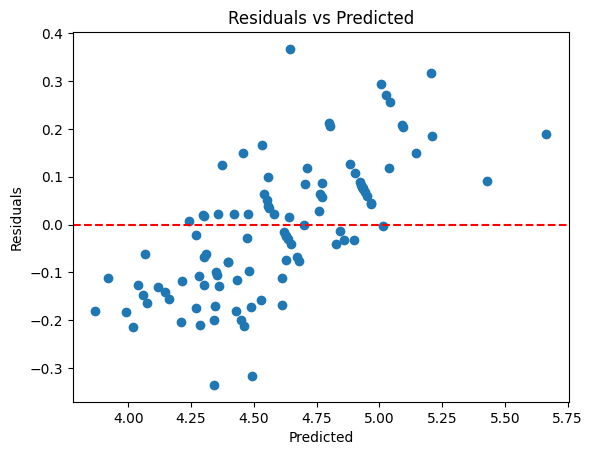

In [43]:
residuals = y_test - best_model.predict(X_test)
plt.scatter(best_model.predict(X_test), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

<Axes: >

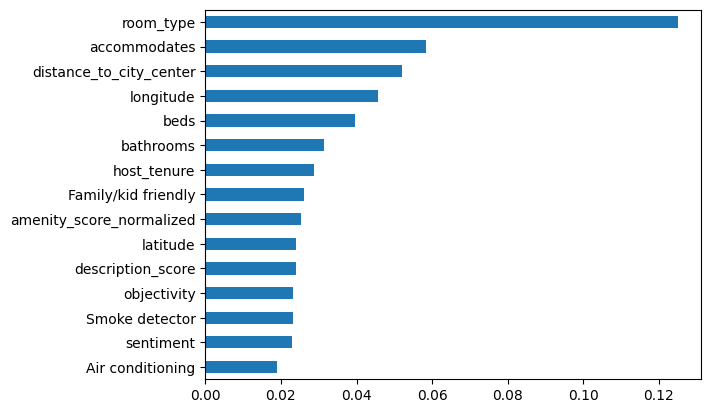

In [44]:
importances = best_model.feature_importances_
feat_names = X.columns
pd.Series(importances, index=feat_names).sort_values().tail(15).plot(kind='barh')

In [45]:
from sklearn.model_selection import cross_val_score

#rmse_scorer = make_scorer(mean_squared_error, squared=False, greater_is_better=False)
#cv_scores = cross_val_score(best_model, X, y, cv=5, scoring=rmse_scorer)

#cv_rmse_scores = -cv_scores

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
cv_rmse_scores = -cv_scores  # convert negative RMSE to positive

print("Cross-Validated RMSE Scores:", cv_rmse_scores)
print("Average CV RMSE:", cv_rmse_scores.mean())
print("Std Dev:", cv_rmse_scores.std())


Cross-Validated RMSE Scores: [0.3757616  0.51658758 0.42980209 0.40876118 0.37992269]
Average CV RMSE: 0.4221670294661406
Std Dev: 0.051168933836673675


In [46]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train) 

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
weak_feats = feat_importances[feat_importances < 0.015].index
X_reduced = X.drop(columns=weak_feats)


X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
cv_reduced = cross_val_score(best_model, X_reduced, y, cv=5, scoring='neg_root_mean_squared_error')
cv_rmse_reduced_score = -cv_reduced

print("Cross-Validated RMSE Scores:", cv_rmse_reduced_score)
print("Average CV RMSE:", cv_rmse_reduced_score.mean())
print("Std Dev:", cv_rmse_reduced_score.std())

Cross-Validated RMSE Scores: [0.35266282 0.43258401 0.43245496 0.36456373 0.46775982]
Average CV RMSE: 0.41000506706647555
Std Dev: 0.04405103158661099


# GradientBoostingRegressor

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

X = X_cleaned.drop(columns=['log_price', 'strictness_level', 'city'], errors='ignore')  # keep all original features
y = X_cleaned['log_price']

gbr = GradientBoostingRegressor(
    n_estimators=300,     # number of boosting stages
    learning_rate=0.05,   # step size shrinkage
    max_depth=4,          # depth of each tree
    random_state=42
)

cv_scores = cross_val_score(
    gbr, X, y, 
    cv=5, 
    scoring='neg_root_mean_squared_error'
)

cv_rmse = -cv_scores

print("Cross-Validated RMSE Scores:", cv_rmse)
print("Average RMSE:", np.mean(cv_rmse))
print("Std Dev:", np.std(cv_rmse))

Cross-Validated RMSE Scores: [0.37256779 0.45467617 0.44076306 0.41662406 0.45145591]
Average RMSE: 0.4272173992926097
Std Dev: 0.030409778130580246
